# 

In [21]:
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import heapq

import itertools
import random

In [22]:
def is_derangement(arr):
    return all(i != x for i, x in enumerate(arr))
    
def derangements(N):
    ans = []
    A = list(range(N))

    def go(i):
        if i == N:
            yield A.copy()
            # ans.append(A.copy())
        else:
            for j in range(i, N):
                if A[j] != i:
                    A[i], A[j] = A[j], A[i]
                    yield from go(i+1)
                    A[i], A[j] = A[j], A[i]
                    pass

    # go(0)
    # assert len(ans) == count_derangements(N)
    yield from go(0)

In [23]:
def deterministic(A, log=False):
    counter = Counter()
    swaps = 0
    if log:
        print(A, swaps)
    itrs = 0
    for i in range(len(A)):
        if A[i] == i:
            continue
        itrs += 1
        j = i + 1
        inner_swaps = 0
        while not A[i] == i:
            if A[j] != j:
                A[i], A[j] = A[j], A[i]
                swap_type = int(A[i] == i) + int(A[j] == j)
                counter[swap_type] += 1
                swaps += 1
                inner_swaps += swap_type
                # if log:
                #     print(A, swaps)
            j += 1
        if log:
            print(A, inner_swaps, swaps)

    return swaps
    # return itrs
    return counter


In [24]:
def deterministic2(arr, log=False):
    if log: print(arr)
    n = len(arr)
    swaps = 0
    i = 0

    while i < n:
        for j in range(i, n):
            if arr[j] != j:
                arr[i], arr[j] = arr[j], arr[i]
                swaps += 1
            
            if arr[i] == i:
                i += 1

        if log: print(arr)

    return swaps

deterministic2([5, 6, 7, 8, 9, 4, 3, 2, 1, 0])

40

In [25]:
N = 8
worst_input =  max(
    # derangements(N), key=lambda A: sum(deterministic(A.copy()).values()))
    derangements(N), key=lambda A: deterministic2(A.copy()))

print(worst_input)
print(deterministic2(worst_input, True))



'''
12: [[7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0],
 [7, 8, 9, 10, 11, 3, 5, 6, 4, 2, 1, 0]]
'''


# heapq.nlargest(2, derangements(N), key=lambda A: sum(deterministic(A.copy()).values()))

[1, 6, 7, 2, 0, 4, 3, 5]
[1, 6, 7, 2, 0, 4, 3, 5]
[0, 5, 6, 7, 2, 1, 4, 3]
[0, 1, 3, 6, 7, 2, 5, 4]
[0, 1, 2, 4, 6, 7, 3, 5]
[0, 1, 2, 3, 5, 6, 7, 4]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
30


'\n12: [[7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0],\n [7, 8, 9, 10, 11, 3, 5, 6, 4, 2, 1, 0]]\n'

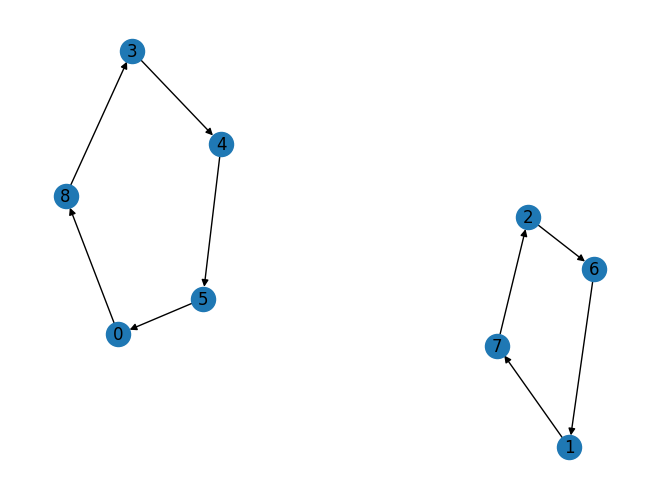

In [26]:

arr = [6, 7, 8, 9, 3, 4, 5, 2, 1, 0]
# arr = [5, 6, 7, 8, 9, 4, 3, 2, 1, 0]
arr = [5, 6, 7, 8, 3, 4, 2, 1, 0]

def build_graph(arr):
    graph = defaultdict(list)
    for i, x in enumerate(arr):
        graph[x].append(i)
    return graph

G = nx.DiGraph(build_graph(arr))
pos = nx.spring_layout(G, scale=3)

nx.draw(G, pos, with_labels = True)

In [27]:
arr = [5, 6, 7, 8, 9, 4, 3, 2, 1, 0]
# arr = [6, 7, 8, 9, 3, 4, 5, 2, 1, 0]
# arr = [7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0]
# arr =  [6, 7, 8, 9, 10, 4, 5, 3, 2, 1, 0]
# arr =  [6, 7, 8, 9, 10, 3, 4, 5, 2, 1, 0]
# arr =  [3, 4, 5, 2, 1, 0, 6, 7, 8, 9, 10]
# arr = [6, 7, 8, 9, 10, 11, 5, 4, 3, 2, 1, 0]

# arr = [2, 3, 1, 0]

# arr =  [4, 5, 3, 2, 1, 0, 6, 7, 8, 9, 10]  # 6 * 5 = 30
# arr =  [3, 2, 1, 0, 4, 5, 6, 7, 8, 9, 10] #  4 * 2 = 8
# arr =  [3, 2, 1, 0, 4, 5, 6, 7, 8, 9, 10] #  3 * 1 = 3
# arr =  [2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10] #  2 * 1 = 2
# arr =  [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10] #  1 * 1 = 1

# arr =  [6, 7, 8, 9, 10, 3, 4, 5, 2, 1, 0] # 6 * 5  = 30
# arr =  [3, 4, 5, 2, 1, 0, 6, 7, 8, 9, 10] # 3 * 3  = 9
# arr =  [2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10] # 2 * 1  = 2
# arr =  [2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10] # 1 * 1  = 1

# arr = [7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0] = 5 * 7 = 35
# arr = [4, 5, 6, 3, 2, 1, 0, 7, 8, 9, 10, 11] = 3 * 4 = 12
# arr = [3, 2, 1, 0, 4, 5, 6, 7, 8, 9, 10, 11] = 1 * 3 = 3
# arr = [2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11] = 1 * 2 = 2
# arr = [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] = 1 * 1 = 1

# arr = [7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0] = 5 * 7 = 35
# pick i where 1 <= i < n, we need i * (n - i) swaps
# n = 7
# arr = [4, 5, 6, 3, 2, 1, 0, 7, 8, 9, 10, 11] = 5 * 7 = 35
# pick i where 1 <= i <= n, we need i * (n - i) swaps
# i = 4 (i * 3)

# @lru_cache(None)
# def worst(n):
#     if n == 1: return 0
#     if n == 2: return 1
#     ans = 0
#     for i in range(1, n):
#         swaps = i * (n - i)
#         ans = max(ans, swaps + worst(i))
#     return ans

# print(worst(12))

from collections import deque

def deterministic_swaps(arr):
    q = deque(arr)
    swaps = 0
    
    while q:
        popped = 0
        start = q[0]
        prev = float('-inf')
        while q and (prev < q[0]):
            x = q.popleft()
            popped += 1
            prev = x
        swaps += start * popped
        
    return swaps
    

'''
+7 + 6

+ 5 + 5 + 5 
'''


'''
arr = [7, 8, 9, 10, 11, 12, 13, 6, 5, 4, 3, 2, 1, 0] # 70
arr = [8, 9, 10, 11, 12, 13, 5, 6, 7, 4, 3, 2, 1, 0] # 73
arr = [4, 5, 3, 2, 1, 0]
arr = [2, 0, 1]
'''

arr = [9, 3, 7, 6, 5, 4, 0, 2, 1, 8]
arr =  [7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0]

arr =  [3, 4, 1, 2, 0]
# arr =  [2, 3, 4, 1, 0]
arr = [3, 4, 5, 2, 1, 0]
arr = [3, 4, 5, 0, 1, 2]

arr = [3, 4, 2, 1, 0]
# arr = [3, 4, 1, 2, 0]

deterministic(arr, True)

# 3 2 4 1 0




# deterministic_swaps(arr)
# worst_input

[3, 4, 2, 1, 0] 0
[0, 3, 2, 4, 1] 1 3
[0, 1, 2, 3, 4] 3 5


5

In [28]:
arr = [7, 8, 9, 10, 11, 4, 5, 6]
arr = [6, 7, 8, 9, 10, 11, 5, 4]
arr = [ 4, 5, 6, 3, 2, 1, 0]
arr = [3, 4, 2, 1, 0]
arr = [ 4, 5, 3, 2, 1, 0]

'''
[2, 3, 4, 5, 6, 7, 1, 0]
[3, 4, 5, 6, 7, 0, 1, 2]

[4, 5, 6, 7, 0, 1, 2, 3]

4 + 4 + 4 + 4

[3, 4, 5, 6, 7, 0, 1, 2]

5 + 5 + 5

[5, 6, 7, 0, 1, 2, 3, 4]

0 1 2 3 4 5 6 7 4

4 + 4 + 4 + 4

'''


def reduce(derangement):
    ans = [x for i, x in enumerate(derangement) if x != i]
    s = sorted(ans)
    ranks = {x: i for i, x in enumerate(s)}
    return [ranks[x] for x in ans]
    
reduce(arr)

[4, 5, 3, 2, 1, 0]

In [29]:
from adversary.adversary import Adversary

def probabilistic(n):
    A = Adversary(n)
    swaps = 0
    two_swaps = 0

    frozen = set()

    while len(frozen) < n:
        candidates = set(range(n)) - frozen
        pairs = list(itertools.combinations(candidates, 2))
        i, j = random.choice(pairs)
        swaps += 1
        l = A.swap(i, j)
        if len(l) == 2:
            two_swaps += 1
        # frozen.update(A.swap(i, j))
        frozen.update(l)

    print(two_swaps)
    print(A.original_array())
    return swaps

probabilistic(10)

1
[8, 3, 9, 7, 5, 0, 1, 2, 6, 4]


95

In [30]:
from functools import lru_cache

@lru_cache(None)
def worst(n):
    if n == 2: return 1
    max_swaps = 0
    for i in range(1, n):
        swaps = i
        for k in range(i + 1):
            max_swaps = max(max_swaps, swaps + worst(n - k - 1))
    return max_swaps
            
print(worst(100))

14950 / 19900
3725 / 4950

4950


0.7525252525252525

In [31]:
# arr = [6, 7, 8, 9, 3, 4, 5, 2, 1, 0]
# arr arr = [7, 8, 9, 10, 11, 4, 5, 6, 3, 2, 1, 0]
arr = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


c = Counter()
for i in range(len(arr)):
    for j in range(i +1, len(arr)):
        if arr[i] > arr[j]:
            c[i] += 1

for i, x in enumerate(arr):
    c[x] = min(max(x - i, 0), c[x])

sum(c.values())

7

In [32]:
def deterministic(A, log=False):
    assert is_derangement(A)
    counter = Counter()
    swaps = 0
    if log:
        print(A, swaps)
    itrs = 0
    for i in range(len(A)):
        if A[i] == i:
            continue
        itrs += 1
        j = i + 1
        inner_swaps = 0
        while not A[i] == i:
            if A[j] != j:
                A[i], A[j] = A[j], A[i]
                swap_type = int(A[i] == i) + int(A[j] == j)
                counter[A[i]] += 1
                counter[A[j]] += 1
                swaps += 1
                inner_swaps += swap_type
                # if log:
                #     print(A, swaps)
            j += 1
        if log:
            print(A, inner_swaps, swaps)

    # return itrs
    # return counter
    return swaps



In [33]:

def deterministic_itrs(A, log=False):
    swaps = 0
    if log:
        print(A, swaps)

    itrs = 0
    track = {}
    for i in range(len(A)):
        if A[i] == i:
            continue
        j = i + 1
        while not A[i] == i:
            if A[j] != j:
                A[i], A[j] = A[j], A[i]
                if A[i] == i:
                    track[A[i]] = itrs
                    
                if A[j] == j:
                    track[A[j]] = itrs
                    
                swaps += 1
            j += 1
        if log:
            print(A, inner_swaps, swaps)
        itrs += 1

    # return itrs
    return track

arr = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
'''
arr = [_0, 9, 8, 7, 6, _5, 4, 3, 2, 1] 9
arr = [_0, _1, 9, 8, 7, _5, _6, 4, 3, 2] 7
arr = [_0, _1, _2, 9, 8, _5, _6, _7, 4, 3] 3
arr = [_0, _1, _2, _3, 9, _5, _6, _7, _8, 4] 1
'''
deterministic_itrs(arr)

# c = Counter()
# for arr in derangements(9):
#     res = deterministic_itrs(arr).items()
#     key = tuple(res)
#     c[key] += 1

# [(k, v) for k, v in c.items() if v > 1]

    


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, _, _, _, _, _]

[9, 8, 7, 6, 5, 7, 7, 7, 7, 7]

In [34]:
def increment(arr):
    return [x+1 for x in arr]

# [4, 5, 6, 2, 3, 1, 0]
increment([3, 4, 5, 2, 1, 0])
# [4, 5, 6, 3, 2, 1, 0]

2, 3, 4, 1, 0

# deterministic([4, 5, 6, 1, 2, 3, 0]) # 6 + 3 + 3 + 3
# deterministic([4, 5, 6, 2, 3, 1, 0], True) # Golden: 
deterministic([7, 8, 9, 10, 11, 12, 4, 5, 6, 3, 2, 1, 0], True)
deterministic([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4, 3, 2, 1, 0] , True)

[7, 8, 9, 10, 11, 12, 4, 5, 6, 3, 2, 1, 0] 0
[0, 7, 8, 9, 10, 11, 12, 4, 5, 6, 3, 2, 1] 1 12
[0, 1, 7, 8, 9, 10, 11, 12, 4, 5, 6, 3, 2] 1 23
[0, 1, 2, 7, 8, 9, 10, 11, 12, 4, 5, 6, 3] 1 33
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 4, 5, 6] 1 42
[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 5, 6] 1 48
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 6] 1 54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 7 60
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4, 3, 2, 1, 0] 0
[0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4, 3, 2, 1] 1 21
[0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4, 3, 2] 1 41
[0, 1, 2, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4, 3] 1 60
[0, 1, 2, 3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5, 4] 1 78
[0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6, 5] 1 95
[0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 9, 10, 11, 8, 7, 6] 1 111
[0, 1, 2, 3, 4, 5, 6, 12, 13, 14,

183

In [35]:
def build(i, j, k):
    n = i + j + k
    tail = list(reversed(range(k)))
    middle = list(range(k, k + j))
    head = list(range(k + j, k + j + i))
    ret = head + middle +tail
    assert is_derangement(ret)
    return ret


In [36]:
from adversary.adversary import Adversary

def deter_player(n):
    A = Adversary(n)
    frozen = set()
    swaps = 0

    for i in range(n):
        j = i + 1
        while i not in frozen:
            if j not in frozen:
                frozen.update(A.swap(i, j))
                swaps += 1
            j += 1

    print(A.original_array())
    return swaps

def deter_player2(n):
    A = Adversary(n)
    frozen = set()
    i = 0
    swaps = 0

    while i < n:
        for j in range(i, n):
            if j not in frozen:
                frozen.update(A.swap(i, j))
                swaps += 1
            
            if i in frozen:
                i += 1

    print(A.original_array())
    return swaps

deter_player2(10)

[5, 6, 7, 8, 9, 4, 3, 2, 1, 0]


40

In [59]:
def n_choose_2(n):
    return (n * (n - 1)) // 2
    
def get_swaps(a, b, c):
    n = a + b + c
    return a * b + (c * n - n_choose_2(c+1))
    
def even_worse_dict(n):
    # return max(
    #     ((a, n - a - c, c)
    #     for a in range(2, n)
    #     for c in range(min(a, n - a) + 1)),
    #     key=lambda t: get_swaps(*t)
    #     )

    counter = defaultdict(list)
    for a in range(2, n):
        for c in range(min(a, n - a)):
            b = n - a - c
            res = get_swaps(a, b, c)
            # print(a, b, c, ':',res)
            counter[res].append((a, b, c))

    return counter

N = 3
res = even_worse(N)
# for x in sorted(res):
#     print(x, res[x])

print(deter_player(N))

worse_input = res[max(res)][0]

print(build(*worse_input))

print(deterministic(build(*worse_input)))

INIT = -1
NEWLY_PROMOTED = 0
DEMOTE_1 = 1
PERFORM_AT_LEVEL_1 = 3
PERFORM_AT_LEVEL_2 = 4
PERFORM_AT_LEVEL_3 = 5

current_state = NEWLY_PROMOTED
prev_diff = 0
expect = 1
for n in range(3, 100):
    result = even_worse(n)
    actual = deterministic(build(*result[max(result)][0]))
    abs_max = n_choose_2(n)
    print('n:', n, 'abs_max:', abs_max, 'actual:', actual, abs_max - actual)

    cur_diff = abs_max - actual
    delta = cur_diff - prev_diff
    prev_diff = cur_diff

    assert delta == expect
    # state transition
    if current_state == NEWLY_PROMOTED:
        expect -= 1
        current_state = DEMOTE_1
        pass
    elif current_state == DEMOTE_1:
        expect += 1
        current_state = PERFORM_AT_LEVEL_1
    elif current_state == PERFORM_AT_LEVEL_1:
        current_state = PERFORM_AT_LEVEL_2
    elif current_state == PERFORM_AT_LEVEL_2:
        current_state = PERFORM_AT_LEVEL_3
    elif current_state == PERFORM_AT_LEVEL_3:
        expect += 1
        current_state = NEWLY_PROMOTED


    # print(n_choose_2(n), actual)


'''
1 1 2 3 4 6 7 9 11 13 16 18 21 24 27 31 34 38 42 46 51 55 60 65 70 76 81 87 93 99 106 112 119 126 133 141 148 156 164 172 181 189 198 207 216 226 235 245 255 265 276 286 297 308 319 331

1 0 1 1 1 2 1 2 2  2  3  2  3  3  3  4  3  4  4  4  5  4  5  5  5  6  5  6  6  6  7   6   7   7   7   8   7   8   8   8   9   8   9   9   9   10  9   10   10  10  11 10  11 11 11  12
'''

[1, 2, 0]
2


TypeError: list indices must be integers or slices, not tuple

In [38]:
def even_worse(n):
    # return max(
    #     ((a, n - a - c, c)
    #     for a in range(2, n)
    #     for c in range(min(a, n - a) + 1)),
    #     key=lambda t: get_swaps(*t)
    #     )

    counter = defaultdict(list)
    for a in range(2, n):
        for c in range(min(a, n - a)):
            b = n - a - c
            res = get_swaps(a, b, c)
            # print(a, b, c, ':',res)
            counter[res].append((a, b, c))

    return counter[max(counter)]

def even_worse2(n):
    # return max(
    #     ((a, n - a - c, c)
    #     for a in range(2, n)
    #     for c in range(min(a, n - a) + 1)),
    #     key=lambda t: get_swaps(*t)
    #     )

    counter = defaultdict(list)
    for a in range(2, n):
        c = a - 1
        b = n - a - c
        res = get_swaps(a, b, c)
        counter[res].append((a, b, c))

    return counter[max(counter)]
    

for i in range(3, 101):
    print(i, even_worse(i))
    # assert even_worse(i) == even_worse2(i)
    

3 [(2, 1, 0)]
4 [(2, 1, 1)]
5 [(2, 2, 1)]
6 [(3, 1, 2)]
7 [(3, 2, 2)]
8 [(3, 3, 2), (4, 1, 3)]
9 [(4, 2, 3)]
10 [(4, 3, 3)]
11 [(5, 2, 4)]
12 [(5, 3, 4)]
13 [(5, 4, 4), (6, 2, 5)]
14 [(6, 3, 5)]
15 [(6, 4, 5)]
16 [(7, 3, 6)]
17 [(7, 4, 6)]
18 [(7, 5, 6), (8, 3, 7)]
19 [(8, 4, 7)]
20 [(8, 5, 7)]
21 [(9, 4, 8)]
22 [(9, 5, 8)]
23 [(9, 6, 8), (10, 4, 9)]
24 [(10, 5, 9)]
25 [(10, 6, 9)]
26 [(11, 5, 10)]
27 [(11, 6, 10)]
28 [(11, 7, 10), (12, 5, 11)]
29 [(12, 6, 11)]
30 [(12, 7, 11)]
31 [(13, 6, 12)]
32 [(13, 7, 12)]
33 [(13, 8, 12), (14, 6, 13)]
34 [(14, 7, 13)]
35 [(14, 8, 13)]
36 [(15, 7, 14)]
37 [(15, 8, 14)]
38 [(15, 9, 14), (16, 7, 15)]
39 [(16, 8, 15)]
40 [(16, 9, 15)]
41 [(17, 8, 16)]
42 [(17, 9, 16)]
43 [(17, 10, 16), (18, 8, 17)]
44 [(18, 9, 17)]
45 [(18, 10, 17)]
46 [(19, 9, 18)]
47 [(19, 10, 18)]
48 [(19, 11, 18), (20, 9, 19)]
49 [(20, 10, 19)]
50 [(20, 11, 19)]
51 [(21, 10, 20)]
52 [(21, 11, 20)]
53 [(21, 12, 20), (22, 10, 21)]
54 [(22, 11, 21)]
55 [(22, 12, 21)]
56 [(23, 11, 22

In [39]:
even_worse(20)



[(8, 5, 7)]

In [41]:
def predict(arr):
        
    def get_inversions(arr):
        res = []
        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                if arr[i] > arr[j]:
                    res.append((arr[i], arr[j]))
        return res

    def get_num_inversions(inversions):
        c = Counter()
        for x, _ in inversions:
            c[x] += 1
        return c


    pos = {x: i for i, x in enumerate(arr)}
    def is_intermediate(x):
        return x > pos[x]
        
    inversions = get_inversions(arr)
    num_inversions = get_num_inversions(inversions)
    swaps = 0

    for x in arr:
        if is_intermediate(x):
            swaps += x - pos[x]
        else:
            swaps += num_inversions[x]

    for x, y in inversions:
        if is_intermediate(y):
        # if is_intermediate(x) and is_intermediate(y):
            swaps -= 1

    return swaps

for A in derangements(5):
    assert(deterministic(A.copy()) == predict(A))

In [42]:
def get_intermediate_inversions(arr):
    def get_inversions(arr):
        res = []
        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                if arr[i] > arr[j]:
                    res.append((arr[i], arr[j]))
        return res

    def is_intermediate(x):
        return x > arr.index(x)
        
    return sum(is_intermediate(y) for _, y in get_inversions(arr))

get_intermediate_inversions([6, 7, 8, 9, 2, 3, 4, 5, 1, 0])


0

In [ ]:
def get_type_inversions(arr):
    def get_inversions(arr):
        res = []
        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                if arr[i] > arr[j]:
                    res.append((arr[i], arr[j]))
        return res

    def is_intermediate(x):
        return int(x > arr.index(x))

    # c = Counter()
    c = defaultdict(list)
    for x, y in get_inversions(arr):
        print(x, y)
        # c[is_intermediate(x), is_intermediate(y)] += 1
        c[is_intermediate(x), is_intermediate(y)].append((x, y))
        
    return c

c = (get_type_inversions([5,4,3,0,1,2]))

print(c)
print(c[1, 0])
print(c[0, 0])
print(c[1, 1])

# arr = [6, 7, 8, 9, 3, 4, 5, 2, 1, 0]
'''
for i, A in enumerate(derangements(6)):
    c = get_type_inversions(A)
    swaps = deterministic(A)
    assert swaps == c[1, 0] + c[0, 0] - c[1, 1]
'''

In [43]:
def count_intermediate_inversions(arr):
    def get_inversions(arr):
        res = []
        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                if arr[i] > arr[j]:
                    res.append((arr[i], arr[j]))
        return res

    def is_intermediate(x):
        return int(x > arr.index(x))

    inv = get_inversions(arr)
    return len(inv), sum(is_intermediate(y) for _, y in inv)

for i, A in enumerate(derangements(6)):
    res = count_intermediate_inversions(A)
    if res[1] == 0:
        print(A, res)

[1, 0, 3, 2, 5, 4] (3, 0)
[1, 0, 3, 4, 5, 2] (4, 0)
[1, 0, 3, 5, 2, 4] (4, 0)
[1, 0, 4, 2, 5, 3] (4, 0)
[1, 0, 4, 5, 2, 3] (5, 0)
[1, 0, 4, 5, 3, 2] (6, 0)
[1, 0, 5, 2, 3, 4] (4, 0)
[1, 2, 0, 4, 5, 3] (4, 0)
[1, 2, 0, 5, 3, 4] (4, 0)
[1, 2, 3, 0, 5, 4] (4, 0)
[1, 2, 3, 4, 5, 0] (5, 0)
[1, 2, 3, 5, 0, 4] (5, 0)
[1, 2, 4, 0, 5, 3] (5, 0)
[1, 2, 4, 5, 0, 3] (6, 0)
[1, 2, 4, 5, 3, 0] (7, 0)
[1, 2, 5, 0, 3, 4] (5, 0)
[1, 3, 0, 2, 5, 4] (4, 0)
[1, 3, 0, 4, 5, 2] (5, 0)
[1, 3, 0, 5, 2, 4] (5, 0)
[1, 3, 4, 0, 5, 2] (6, 0)
[1, 3, 4, 2, 5, 0] (7, 0)
[1, 3, 4, 5, 2, 0] (8, 0)
[1, 3, 4, 5, 0, 2] (7, 0)
[1, 3, 5, 0, 2, 4] (6, 0)
[1, 3, 5, 2, 0, 4] (7, 0)
[1, 4, 0, 2, 5, 3] (5, 0)
[1, 4, 0, 5, 2, 3] (6, 0)
[1, 4, 0, 5, 3, 2] (7, 0)
[1, 4, 5, 0, 3, 2] (8, 0)
[1, 4, 5, 0, 2, 3] (7, 0)
[1, 4, 5, 2, 0, 3] (8, 0)
[1, 4, 5, 2, 3, 0] (9, 0)
[1, 5, 0, 2, 3, 4] (5, 0)
[2, 0, 1, 4, 5, 3] (4, 0)
[2, 0, 1, 5, 3, 4] (4, 0)
[2, 0, 3, 1, 5, 4] (4, 0)
[2, 0, 3, 4, 5, 1] (5, 0)
[2, 0, 3, 5, 1, 4] (5, 0)
[2, 0, 4, 1,

In [44]:
deterministic([6,7,8,9,5,4,3,2,1,0])
even_worse(12)


[(5, 3, 4)]

In [45]:
def special_derangements(N):
    ans = []
    A = list(range(N))

    def go(i):
        if i == N:
            yield A.copy()
            # ans.append(A.copy())
        else:
            for j in range(i, N):
                if A[j] != i:
                    A[i], A[j] = A[j], A[i]
                    if not (A[i] >= A[j]):
                        pass
                    else:
                        yield from go(i+1)
                    A[i], A[j] = A[j], A[i]
                    pass

    # go(0)
    # assert len(ans) == count_derangements(N)
    yield from go(0)

def worst_case(n):
    # return max(special_derangements(n), key=lambda A: deterministic(list(A)))
    return max(derangements(n), key=lambda A: deterministic(list(A)))

# print(sum(1 for _ in special_derangements(9)))
# print(sum(1 for _ in derangements(9)))
'''
total, cnt = 0, 0
for A in special_derangements(10):
    total += 1
    n = len(A)
    cnt +=  int(any(
            (i, j) for i in range(n) for j in range(i+1,n)
            if A[i] > A[j] and j < A[j]
        ))
    

total, cnt
'''
for i in range(3, 10):
    print(i, worst_case(i))

3 [1, 2, 0]
4 [2, 3, 1, 0]
5 [3, 4, 1, 2, 0]
6 [3, 4, 5, 2, 1, 0]
7 [4, 5, 6, 2, 3, 1, 0]
8 [4, 5, 6, 7, 3, 2, 1, 0]
9 [5, 6, 7, 8, 3, 4, 2, 1, 0]


In [ ]:
def worst_case_dp(n):
    bitmask = (1,) * n
    
    @lru_cache(None)
    def dp(bitmask):
        left = sum(bitmask)
        if left == 0: return 0

        ans = 0
        # zeroes remaining
        zeroes_left = len(bitmask) - left
        idx = zeroes_left
        # ones so far
        osf = 0
        for i, bit in enumerate(bitmask):
            if bit:
                recurse = list(bitmask)
                recurse[i] = 0

                pick = osf
                if idx <= i:
                    pick -= 2 * zeroes_left
                ans = max(ans, pick + dp(tuple(recurse)))
                osf += 1
                
            else:
                zeroes_left -= 1

        return ans

    
    return dp(bitmask)

# for i in range(3, 20):
#     assert worst_case_dp(i) == max(even_worse_dict(i))

# print(worst_case_dp(12))
    
print(worst_case_dp(15) == max(even_worse(15)))
    